In [2]:
import pandas as pd
import json

In [4]:
weather_data = pd.read_csv('../dataset/all_weather_events_labeled_v2.csv')

In [5]:
# Define a function to parse the JSON from the description column and extract event types
def extract_event_types(description):
    try:
        # Parse the JSON content
        events = json.loads(description)
        # Extract the event types
        return [event['event type'] for event in events if 'event type' in event]
    except:
        return []

# Apply this function to the description column
weather_data['event_types'] = weather_data['description'].apply(extract_event_types)

# Preview the updated DataFrame to check the new column
weather_data[['State', 'description', 'event_types']].head()

,State,description,event_types
0,Oklahoma,"[{""event narrative"": ""Totals:00300.000M0.00K"",...","[Ice Storm, Ice Storm, Ice Storm, Ice Storm, I..."
1,Missouri,"[{""event narrative"": ""Totals:000.00K0.00K"", ""c...","[Winter Storm, Winter Storm, Ice Storm, Ice St..."
2,Michigan,"[{""event narrative"": ""Totals:000.00K0.00K"", ""c...","[Ice Storm, Ice Storm, Winter Storm, Ice Storm..."
3,New York,[],[]
4,Florida,"[{""event narrative"": ""Totals:000.00K0.00K"", ""c...","[Funnel Cloud, Funnel Cloud]"


In [8]:
from collections import Counter

# Aggregate the event types by state
event_type_counts_by_state = {}

for index, row in weather_data.iterrows():
    state = row['State']
    event_types = row['event_types']
    
    if state not in event_type_counts_by_state:
        event_type_counts_by_state[state] = Counter()
    
    event_type_counts_by_state[state].update(event_types)

# Show the aggregated event type counts for one state to check
event_type_counts_by_state['Oklahoma']

Counter({'Ice Storm': 129,
         'Winter Storm': 133,
         'Thunderstorm Wind': 716,
         'Hail': 342,
         'Flood': 94,
         'Lightning': 9,
         'Heavy Snow': 117,
         'Tornado': 85,
         'High Wind': 60,
         'Flash Flood': 39,
         'Wildfire': 1,
         'Excessive Heat': 70,
         'Heat': 2,
         'Cold/wind Chill': 147,
         'Extreme Cold/wind Chill': 9})

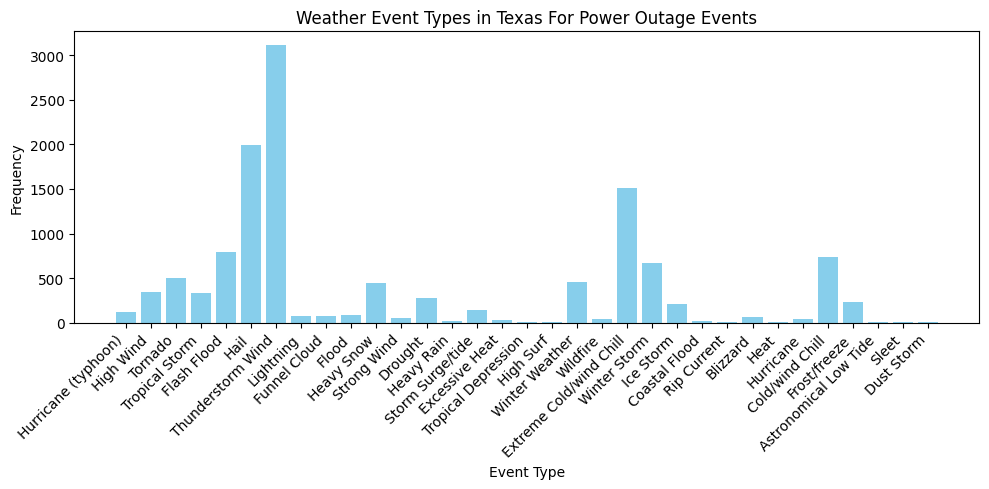

In [30]:
def generate_histogram(state):
    # Check if the state is in the dictionary
    if state in event_type_counts_by_state:
        # Get the event type counts for the specified state
        data = event_type_counts_by_state[state]
        # Create a histogram
        plt.figure(figsize=(10, 5))
        plt.bar(data.keys(), data.values(), color='skyblue')
        plt.title(f'Weather Event Types in {state} For Power Outage Events')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency')
        plt.xlabel('Event Type')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for {state}. Please try another state.")

# Now, you can call this function with any state name to see the histogram, for example:
# generate_histogram('Oklahoma')
# generate_histogram('California')

# Showing how to use the function with an example state:
generate_histogram('Texas')

In [ ]:
def ret_max_similarity(orig, labels):
    vector1 = phrase_vector(orig)
    
    max_sim = 0
    max_word = None
    
    for label in labels:
        vector2 = phrase_vector(label)
        if (1 - cosine(vector1, vector2) > max_sim):
            max_sum = 1 - cosine(vector1, vector2)
            max_word = label
    return label

In [ ]:
from scipy.spatial.distance import cosine
import numpy as np
def phrase_vector(phrase, model):
    words = phrase.split(' ')
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return None  # No word in the phrase was found in the model
    return np.mean(word_vectors, axis=0)

def semantic_similarity(phrase1, phrase2, model):
    vector1 = phrase_vector(phrase1, model)
    vector2 = phrase_vector(phrase2, model)
    if vector1 is not None and vector2 is not None:
        return 1 - cosine(vector1, vector2)
    else:
        return 0
    
def determine_match(orig_label, label_list):
    
    if (len(label_list) == 0):
        return (0,'',[])
    weighted_similarity = []
    for label_prob, label in label_list:  # This makes it clear we're iterating through tuples
        sim = semantic_similarity(orig_label, label, glove_vectors)
        weighted_similarity.append(label_prob * sim)
    return (np.sum(weighted_similarity), orig_label, label_list)